# Patient Info

Data Source: https://www.kaggle.com/kimjihoo/coronavirusdataset

**INCOMPLETE**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pat_df = pd.read_csv('./data/PatientInfo.csv', na_values=['',' ', 'nan', 'etc'])

pat_df['symptom_onset_date'] = pd.to_datetime(pat_df['symptom_onset_date'], format='%Y-%m-%d')
pat_df['confirmed_date'] = pd.to_datetime(pat_df['confirmed_date'], format='%Y-%m-%d')
pat_df['released_date'] = pd.to_datetime(pat_df['released_date'], format='%Y-%m-%d')
pat_df['deceased_date'] = pd.to_datetime(pat_df['deceased_date'], format='%Y-%m-%d')

pat_df

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaT,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaT,2020-01-30,2020-03-02,NaT,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaT,2020-01-30,2020-02-19,NaT,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaT,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaT,2020-01-31,2020-02-24,NaT,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaT,2020-05-30,2020-06-13,NaT,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaT,2020-06-16,2020-06-24,NaT,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaT,2020-06-18,NaT,NaT,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaT,2020-06-18,NaT,NaT,isolated


In [10]:
pat_df['deceased_days'] = (pat_df['deceased_date'] - pat_df['confirmed_date']).dt.days
pat_df['released_days'] = (pat_df['released_date'] - pat_df['confirmed_date']).dt.days
print(f'Average Recovery Time: {round(pat_df["released_days"].mean(),2)} days')
print(f'Average Deceased Time: {round(pat_df["deceased_days"].mean(),2)} days')

Average Recovery Time: 24.73 days
Average Deceased Time: 10.86 days


In [4]:
pat_df.groupby('infected_by')['patient_id'].count().sort_values(ascending=False)

infected_by
2000000205    51
4100000008    27
2000000167    24
1400000209    24
2000000309    21
              ..
2000000301     1
2000000325     1
2000000328     1
2000000338     1
1000000002     1
Name: patient_id, Length: 606, dtype: int64

In [11]:
# pat_df['infected_by'].dropna().to_list()
# pat_df[pat_df['patient_id'].isin(pat_df['infected_by'])]  # doesn't work because infected_by contains strings of multiple ids
pat_df[pat_df['patient_id'].isin([int(x) for x in pat_df['infected_by'].dropna().to_list()])]

ValueError: invalid literal for int() with base 10: '1500000050, 1500000055'

In [70]:
pat_df['infected_by'].dropna()

2       2002000001
4       1000000002
5       1000000003
6       1000000003
9       1000000003
           ...    
5116    6100000097
5123    6100000108
5124    6100000100
5126    6100000103
5156    7000000009
Name: infected_by, Length: 1346, dtype: object

In [45]:
print(f"Average # days till confirmed: {(pat_df['confirmed_date'] - pat_df['symptom_onset_date']).mean()}")
print(f"Average # days till release: {(pat_df['released_date'] - pat_df['confirmed_date']).mean()}")
print(f"Average # days till death: {(pat_df['deceased_date'] - pat_df['confirmed_date']).mean()}")

Average # days till confirmed: 4 days 12:12:33.488372093
Average # days till release: 24 days 17:33:27.561436673
Average # days till death: 10 days 20:43:38.181818181


<AxesSubplot:ylabel='infection_case'>

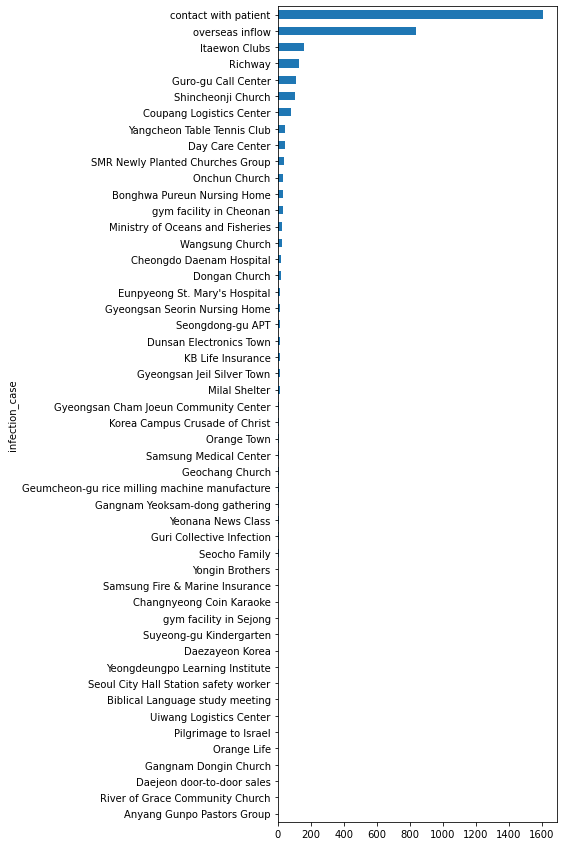

In [58]:
pat_df.groupby('infection_case')['patient_id'].count().sort_values().plot(kind='barh', figsize=(5,15))

In [14]:

pat_df

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaT,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaT,2020-01-30,2020-03-02,NaT,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaT,2020-01-30,2020-02-19,NaT,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaT,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaT,2020-01-31,2020-02-24,NaT,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaT,2020-05-30,2020-06-13,NaT,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaT,2020-06-16,2020-06-24,NaT,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaT,2020-06-18,NaT,NaT,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaT,2020-06-18,NaT,NaT,isolated
